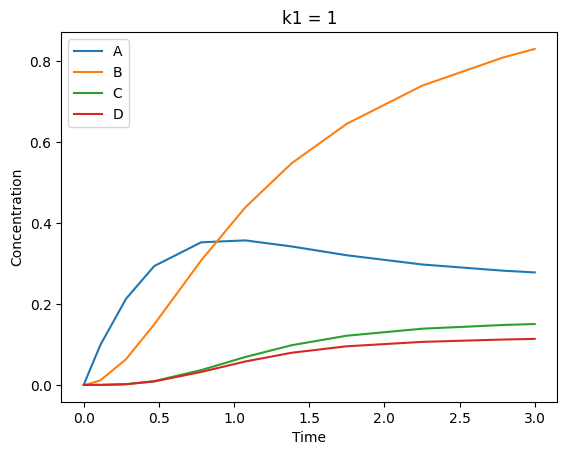

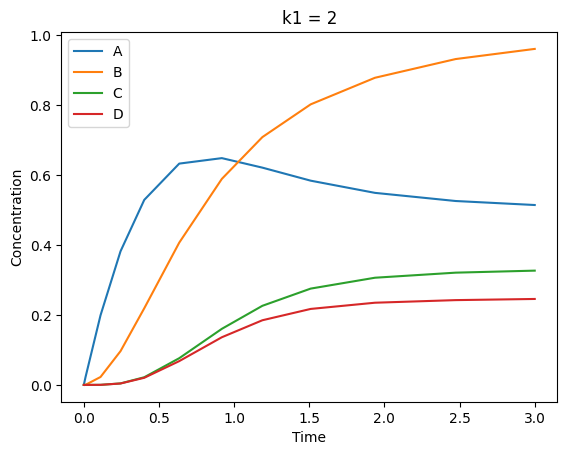

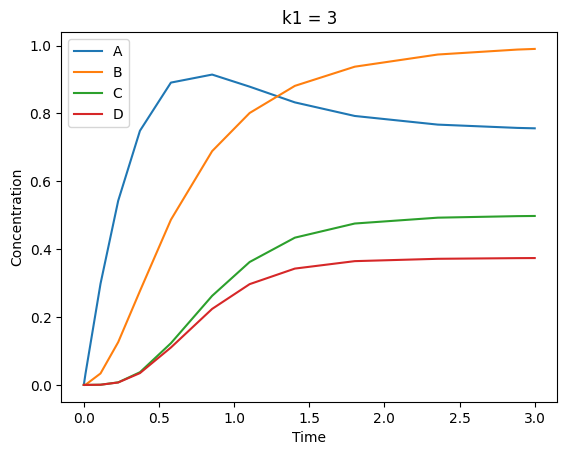

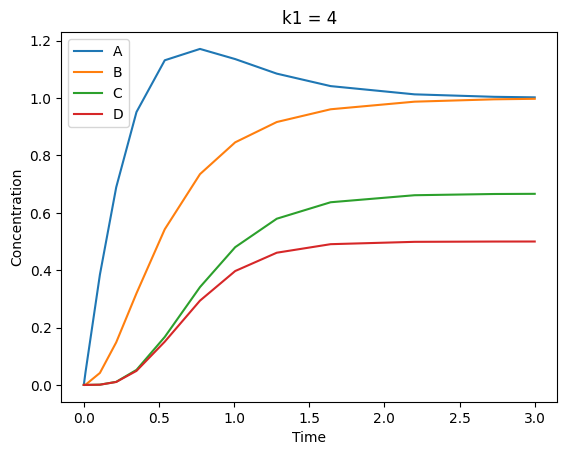

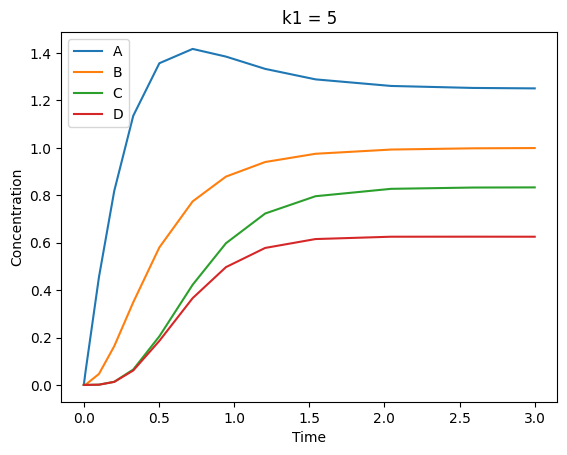

In [11]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

#this code can be resued for basically everything

# dydt is written as a function (like ode45 in MATLAB)
def ChemRxnNet_ODE(t, y, k1, k2, k3, k4, k5):
    #takes in the species

    A,B,C,D = y # unpack y

    # parameters
    # k1 = 3 # mM/s
    # k2 = 2 # 1/s
    # k3 = 2 # 1/(mM s)
    # k4 = 3 # 1/s
    # k5 = 4 # 1/s

    # differential equations
    #there's a video on how to write these down from a reaction network
    dAdt = k1 - k2*A - k3*A*B #these are the right hands of each of the species ?? I think
    dBdt = k2*A - k3*A*B 
    dCdt = k3*A*B - k4*C 
    dDdt = k3*A*B - k5*D 

    #outputs the deriviates for each of the species
    dydt = [dAdt,dBdt,dCdt,dDdt] # repack dydt

    return dydt


# the time interval of the simulation
tspan = [0,3]

# set initial conditions
y0 = [0,0,0,0] # A, B, C, D

# integrate the ODE
for i in range(1,6):
    sol = solve_ivp(ChemRxnNet_ODE, tspan, y0, args=(i, 2, 2, 3, 4))
    #plot the results
    plt.plot(sol.t,sol.y.T) #the T is the transpose to get the dimensions right for plotting
    plt.title(f'k1 = {i}')
    plt.legend(['A','B','C','D'])
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.show()


# k1s = np.linspace(0,5,100)
# for k1 in k1s:
#     sol = solve_ivp(ChemRxnNet_ODE, tspan, y0, args=(k1, 2, 2, 3, 4))
#     #plot the results
#     plt.plot(sol.t,sol.y.T) #the T is the transpose to get the dimensions right for plotting

#     plt.title(f'k1 = {i}')
#     plt.legend(['A','B','C','D'])
#     plt.xlabel('Time')
#     plt.ylabel('Concentration')
#     plt.show()
